In [76]:
#
# What do the stock exchanges look like as a whole?
#
# To get the data for this notebook, run:
#   python update_symbol_metadata.py
#
#

In [40]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12, 8)
from matplotlib import pyplot as plt

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [34]:
nasdaq = pd.read_csv('data/SYMBOLS_NASDAQ.csv').sort_values('MarketCap', ascending=False)
nasdaq.head(10)

,Symbol,Name,MarketCap,IPOyear,Sector,Industry
185,AAPL,Apple Inc.,1.069436e+12,1980.0,Technology,Computer Manufacturing
131,AMZN,"Amazon.com, Inc.",9.166411e+11,1997.0,Consumer Services,Catalog/Specialty Distribution
117,GOOGL,Alphabet Inc.,8.458398e+11,NaN,Technology,"Computer Software: Programming, Data Processing"
116,GOOG,Alphabet Inc.,8.354812e+11,2004.0,Technology,"Computer Software: Programming, Data Processing"
1843,MSFT,Microsoft Corporation,8.258917e+11,1986.0,Technology,Computer Software: Prepackaged Software
935,FB,"Facebook, Inc.",5.017986e+11,2012.0,Technology,"Computer Software: Programming, Data Processing"
1425,INTC,Intel Corporation,2.194860e+11,NaN,Technology,Semiconductors
572,CSCO,"Cisco Systems, Inc.",2.157212e+11,1990.0,Technology,Computer Communications Equipment
623,CMCSA,Comcast Corporation,1.631168e+11,NaN,Consumer Services,Television Services
2168,PEP,"Pepsico, Inc.",1.625904e+11,NaN,Consumer Non-Durables,Beverages (Production/Distribution)


In [35]:
nyse = pd.read_csv('data/SYMBOLS_NYSE.csv').sort_values('MarketCap', ascending=False)
nyse.head(10)

,Symbol,Name,MarketCap,IPOyear,Sector,Industry
69,BABA,Alibaba Group Holding Limited,4.433249e+11,2014.0,Miscellaneous,Business Services
1223,JPM,J P Morgan Chase & Co,3.857305e+11,NaN,Finance,Major Banks
1252,JNJ,Johnson & Johnson,3.606687e+11,NaN,Health Care,Major Pharmaceuticals
881,XOM,Exxon Mobil Corporation,3.313528e+11,NaN,Energy,Integrated oil Companies
2319,V,Visa Inc.,3.248320e+11,NaN,Miscellaneous,Business Services
245,BAC,Bank of America Corporation,3.077910e+11,NaN,Finance,Major Banks
2352,WMT,Walmart Inc.,2.887401e+11,NaN,Consumer Services,Department/Specialty Retail Stores
2371,WFC,Wells Fargo & Company,2.854161e+11,NaN,Finance,Major Banks
2268,UNH,UnitedHealth Group Incorporated,2.520942e+11,NaN,Health Care,Medical Specialities
1750,PFE,"Pfizer, Inc.",2.462084e+11,NaN,Health Care,Major Pharmaceuticals


In [8]:
print(len(nasdaq), len(nyse))

3024 2457


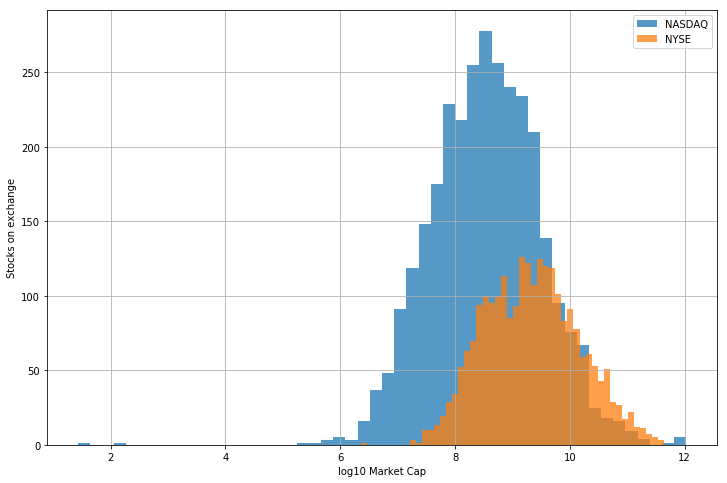

Total market cap (trillions USD):
 	NYSE:	29.05 
	NASDAQ:	13.93


In [58]:
plt.hist(np.log10(nasdaq.MarketCap), bins=50, label='NASDAQ', alpha=0.75)
plt.hist(np.log10(nyse.MarketCap), bins=50, label='NYSE', alpha=0.75)
plt.grid()
plt.legend()
plt.xlabel('log10 Market Cap')
plt.ylabel('Stocks on exchange')
plt.show()

#
# Summary:
#  (i) Market cap seems nearly log-normal distributed
#  (ii) Fewer stocks on NYSE compared to NASDAQ, but higher average market cap
#
print(
    'Total market cap (trillions USD):\n', 
    '\tNYSE:\t{:.2f}'.format(nyse.MarketCap.sum() / 1e12), 
    '\n\tNASDAQ:\t{:.2f}'.format(nasdaq.MarketCap.sum() / 1e12)
)

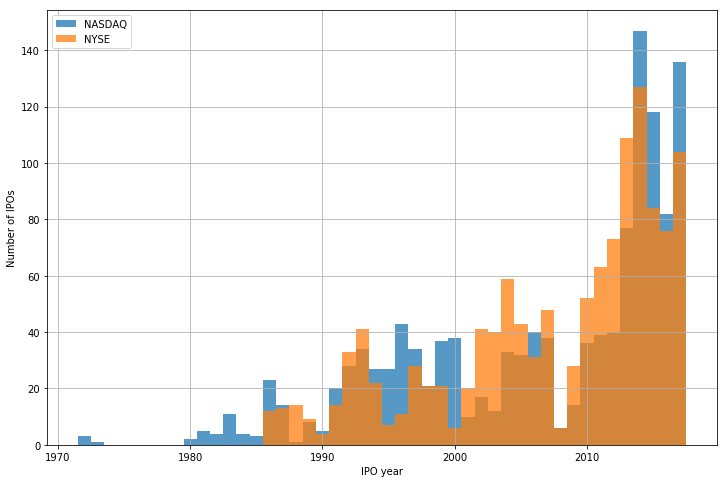

In [73]:
# appearance of stocks on the exchange versus time
bins = np.arange(min(nasdaq.IPOyear) - 0.5, max(nasdaq.IPOyear) + 0.5, 1)
plt.hist(nasdaq[~nasdaq.IPOyear.isna()].IPOyear, alpha=0.75, bins=bins, label='NASDAQ')

bins = np.arange(min(nyse.IPOyear) - 0.5, max(nyse.IPOyear) + 0.5, 1)
plt.hist(nyse[~nyse.IPOyear.isna()].IPOyear, alpha=0.75, bins=bins, label='NYSE')

plt.ylabel('Number of IPOs')
plt.xlabel('IPO year')
plt.legend()
plt.grid()

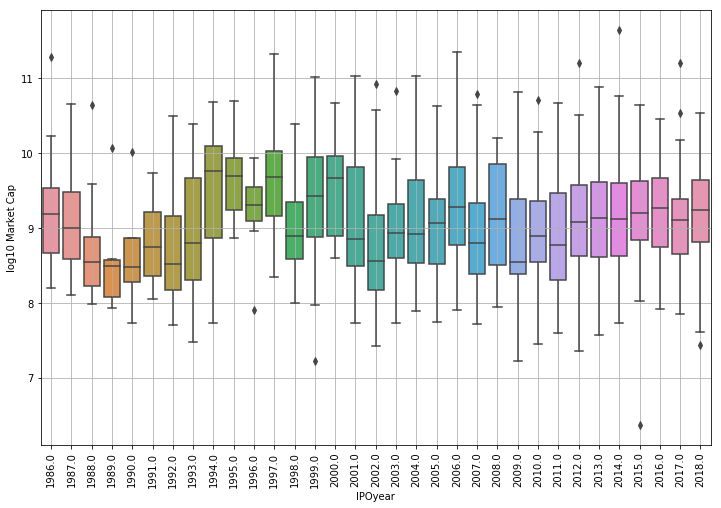

In [74]:
# relationship between IPO year and Market Cap
# companies tend to grow ... should expect older companies to have
# greater market cap typically?
sns.boxplot(x=nyse[~nyse.IPOyear.isna()].IPOyear, y=np.log10(nyse[~nyse.IPOyear.isna()].MarketCap))
plt.ylabel('log10 Market Cap')
plt.xticks(rotation=90)
plt.grid()

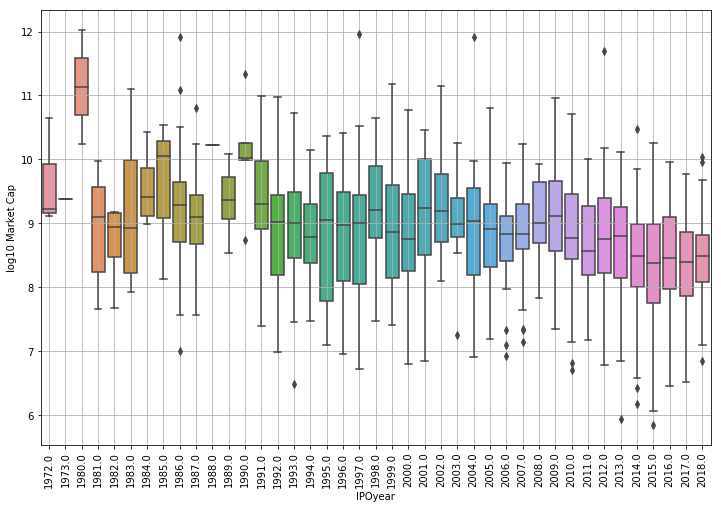

In [75]:
# relationship between IPO year and Market Cap
# companies tend to grow ... should expect older companies to have
# greater market cap typically?
sns.boxplot(x=nasdaq[~nasdaq.IPOyear.isna()].IPOyear, y=np.log10(nasdaq[~nasdaq.IPOyear.isna()].MarketCap))
plt.ylabel('log10 Market Cap')
plt.xticks(rotation=90)
plt.grid()